# Micrograd demonstration

This notebook is a place where I'll be demonstrating usage of Micrograd.

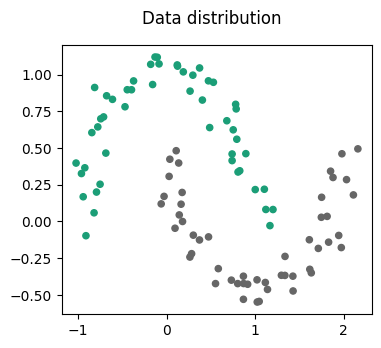

In [38]:
from sklearn.datasets import make_moons, make_blobs
from micrograd.nn import Neuron, Layer, MLP
from micrograd.engine import Value
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

np.random.seed(1337)
random.seed(1337)

X, y = make_moons(n_samples=100, noise=.1)
y = y * 2 - 1

plt.figure(figsize=(4, 3.5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='Dark2')
plt.suptitle('Data distribution')

plt.show()

In [39]:
model = MLP(2, [16, 16, 1])
print(f'Number of parameters: {len(model.parameters())}\n')

Number of parameters: 337



In [40]:
def loss(batch_size=None):
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    scores = list(map(model, inputs))
    
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))

    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.8958441028683222, grad=0) 0.5


In [41]:
for k in range(50):
    total_loss, acc = loss()
    
    model.zero_grad()
    total_loss.backward()
    
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"Step {k}: loss = {total_loss.data}; accuracy = {acc*100}%")

Step 0: loss = 0.8958441028683222; accuracy = 50.0%
Step 1: loss = 1.7235905336972022; accuracy = 81.0%
Step 2: loss = 0.7429006313851131; accuracy = 77.0%
Step 3: loss = 0.7705641260584201; accuracy = 82.0%
Step 4: loss = 0.3692793385976538; accuracy = 84.0%
Step 5: loss = 0.313545481918522; accuracy = 86.0%
Step 6: loss = 0.2814234349772435; accuracy = 89.0%
Step 7: loss = 0.26888733313983904; accuracy = 91.0%
Step 8: loss = 0.2567147286057417; accuracy = 91.0%
Step 9: loss = 0.27048625516379227; accuracy = 91.0%
Step 10: loss = 0.24507023853658041; accuracy = 91.0%
Step 11: loss = 0.25099055297915046; accuracy = 92.0%
Step 12: loss = 0.21560951851922946; accuracy = 91.0%
Step 13: loss = 0.23090378446402737; accuracy = 93.0%
Step 14: loss = 0.20152151227899445; accuracy = 92.0%
Step 15: loss = 0.22574506279282222; accuracy = 93.0%
Step 16: loss = 0.19447987596204103; accuracy = 92.0%
Step 17: loss = 0.21089496199246366; accuracy = 93.0%
Step 18: loss = 0.15983077356303602; accuracy =

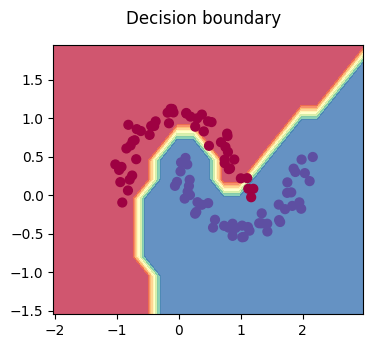

In [42]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(4, 3.5))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.suptitle('Decision boundary')

plt.show();